In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 9.22 s, sys: 2.02 s, total: 11.2 s
Wall time: 17.2 s


In [ ]:
#todo
# remove border
# remove base period
# remove issue date
# remove dataset
# change "GWL3.0" to "+ 3.0C warming" (see e.g. below)
# i wonder if we can also make the text on the colour bars horizontal so it's easier to read (see US example below)
# ideally have whole numbers on scales and remove unnecessary placeholder 0s (e.g. "10.0, 20.0")

CPU times: user 2min 8s, sys: 221 ms, total: 2min 8s
Wall time: 2min 9s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

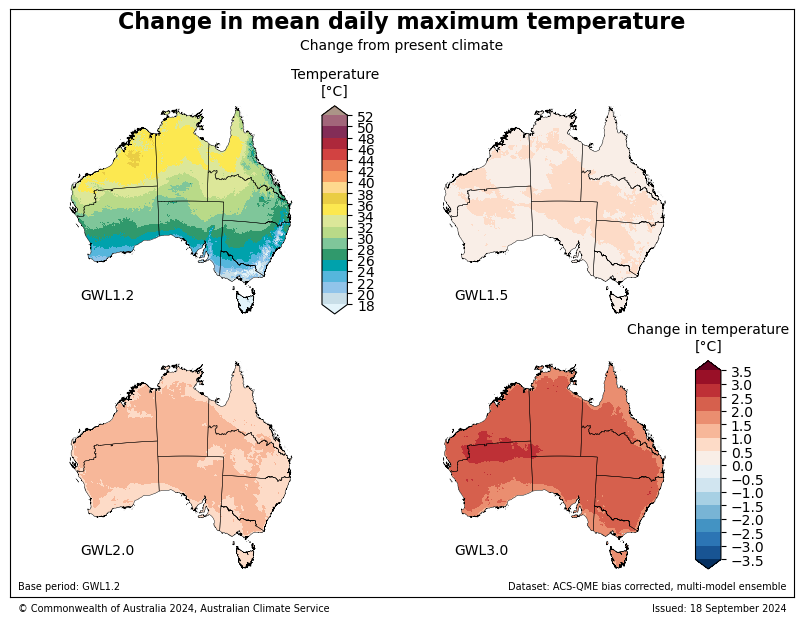

In [27]:
%%time 

var = "TXm"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/TXm/bias-corrected/ensemble/GWL-average/TXm_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

gwl12_kwargs={"cmap": cmap_dict["tasmax"],
                 "cbar_extend":"both",
                 "ticks":np.arange(18,53,2),
                 "tick_labels":None,
                 "cbar_label":"Temperature\n[\N{DEGREE SIGN}C]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Change in mean daily maximum temperature",
                        date_range = f"Change from present climate",
                        baseline="GWL1.2",
                        cmap = cmap_dict["tas_anom"],
                        ticks = np.arange(-3.5, 3.6, 0.5),
                        cbar_label = "Change in temperature\n[\N{DEGREE SIGN}C]",
                        dataset_name = "ACS-QME bias corrected, multi-model ensemble",
                        watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="square")

CPU times: user 1min 54s, sys: 251 ms, total: 1min 55s
Wall time: 1min 55s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

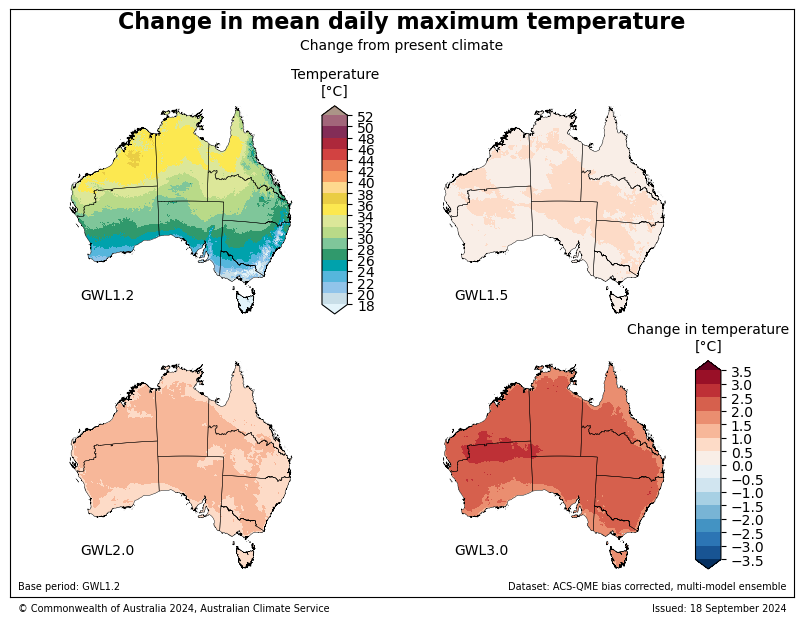

In [4]:
%%time 

var = "TXm"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/TXm/bias-corrected/ensemble/GWL-average/TXm_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

gwl12_kwargs={"cmap": cmap_dict["tasmax"],
                 "cbar_extend":"both",
                 "ticks":np.arange(18,53,2),
                 "tick_labels":None,
                 "cbar_label":"Temperature\n[\N{DEGREE SIGN}C]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Average daily maximum temperature",
                        date_range = f"Change from present climate",
                        baseline="GWL1.2",
                        cmap = cmap_dict["tas_anom"],
                        ticks = np.arange(-3.5, 3.6, 0.5),
                        cbar_label = "Change in temperature\n[\N{DEGREE SIGN}C]",
                        dataset_name = "ACS-QME bias corrected, multi-model ensemble",
                        watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="square")

Using contourf to plot data. Use with caution and check output for data crossing zero
Using contourf to plot data. Use with caution and check output for data crossing zero
Using contourf to plot data. Use with caution and check output for data crossing zero
CPU times: user 3min 42s, sys: 551 ms, total: 3min 42s
Wall time: 3min 43s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

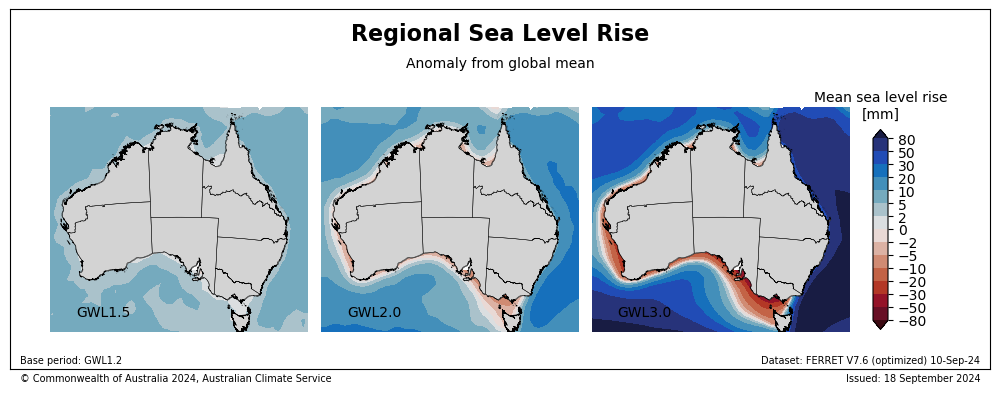

In [5]:
%%time
# regional sea level rise

# Gen, for the regional sea level figures you created, I suggest you remove the following numbers from each panel.  We can then add the number to the figure caption.
# The number reflects the global mean sea level change for the different GWLs that we have used throughout the coastal analysis.   

# 0.04 m, for GW1.5 – GW1.2,  
#  0.14 m, for GW2.0 – GW1.2,
#  0.54 m, for GW3.0 – GW1.2,

# Thanks Richard


var="SL1"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW1.5_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW2.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW3.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var] - 40,
                    ds_gwl20=ds_gwl20[var] - 140,
                    ds_gwl30=ds_gwl30[var] - 540,
                    regions = regions,
                    title = "Regional Sea Level Rise",
                    date_range="Anomaly from global mean",
                    baseline="GWL1.2",
                    cmap = cmap_dict["sst_anom"],
                    ticks = [-80,-50, -30, -20, -10, -5, -2, 0, 2, 5, 10, 20, 30, 50, 80],
                    cbar_label = "Mean sea level rise\n[mm]",
                    dataset_name = "FERRET V7.6 (optimized) 10-Sep-24",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True,
                   contourf=True)

CPU times: user 2min 8s, sys: 271 ms, total: 2min 8s
Wall time: 2min 10s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

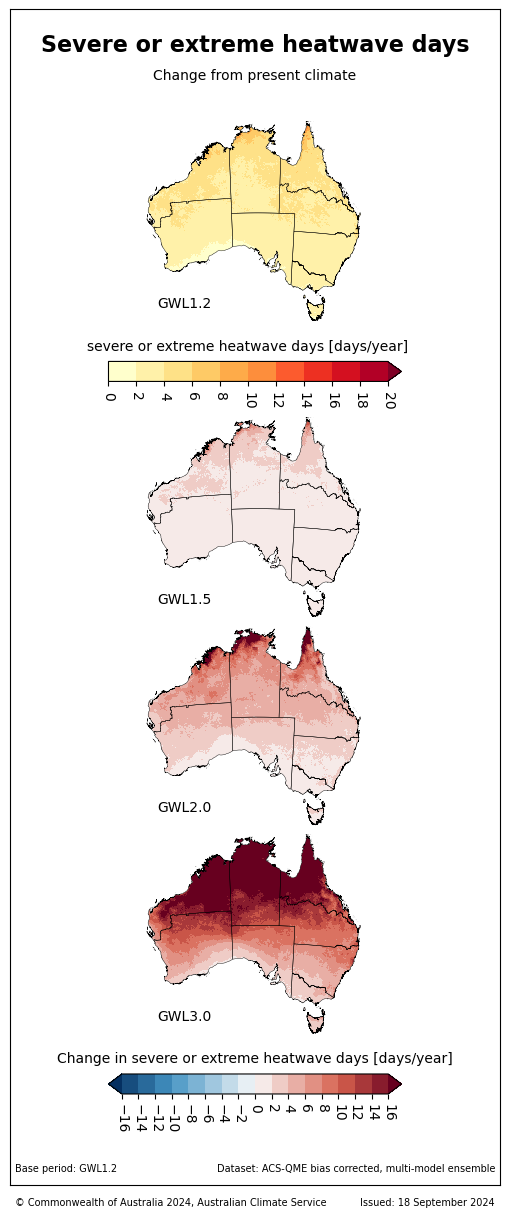

In [6]:
%%time 

var = "HW_sev_ext"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict["EHF_days"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "severe or extreme heatwave days [days/year]",
                         gwl12_ticks= np.arange(0,22, 2),
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Severe or extreme heatwave days",
                        date_range = f"Change from present climate",
                        baseline="GWL1.2",
                        cmap = cmap_dict["ipcc_temp_div"],
                        ticks = np.arange(-16,18,2),
                        cbar_label = "Change in severe or extreme heatwave days [days/year]",
                        dataset_name = "ACS-QME bias corrected, multi-model ensemble",
                        watermark="",
                       orientation="vertical")

CPU times: user 2min 1s, sys: 323 ms, total: 2min 1s
Wall time: 2min 3s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

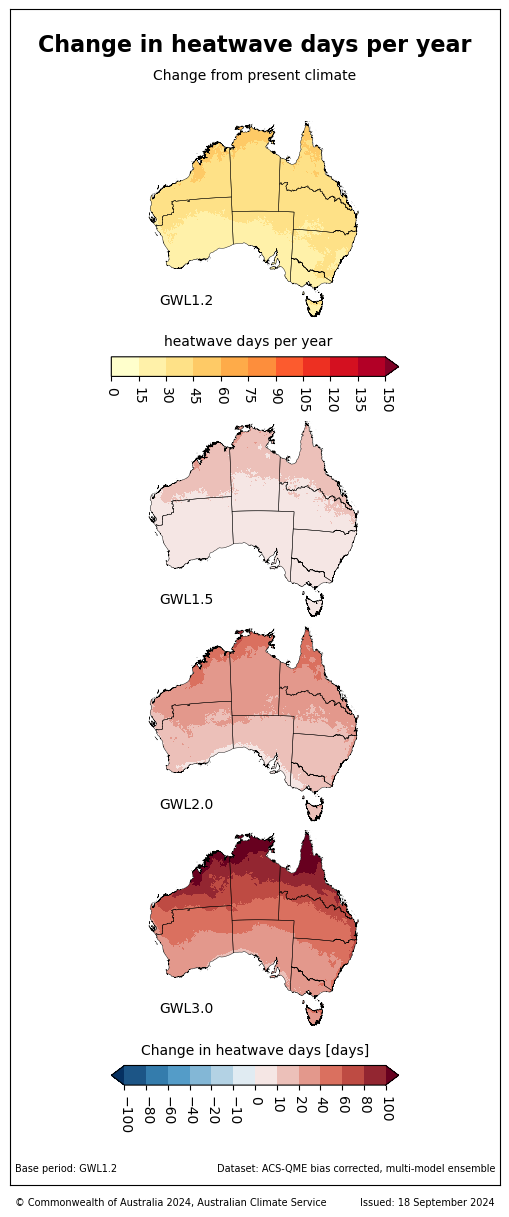

In [7]:
%%time 

var = "HWF"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict["EHF_days"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "heatwave days per year",
                         gwl12_ticks= np.arange(0,165, 15),
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Change in heatwave days per year",
                        date_range = f"Change from present climate",
                        baseline="GWL1.2",
                        cmap = cmap_dict["ipcc_temp_div"],
                        ticks = [-100, -80, -60, -40, -20, -10, 0, 10, 20, 40, 60, 80, 100],
                        cbar_label = "Change in heatwave days [days]",
                        dataset_name = "ACS-QME bias corrected, multi-model ensemble",
                        watermark="",
                       orientation="vertical")

CPU times: user 2min 5s, sys: 284 ms, total: 2min 5s
Wall time: 2min 5s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

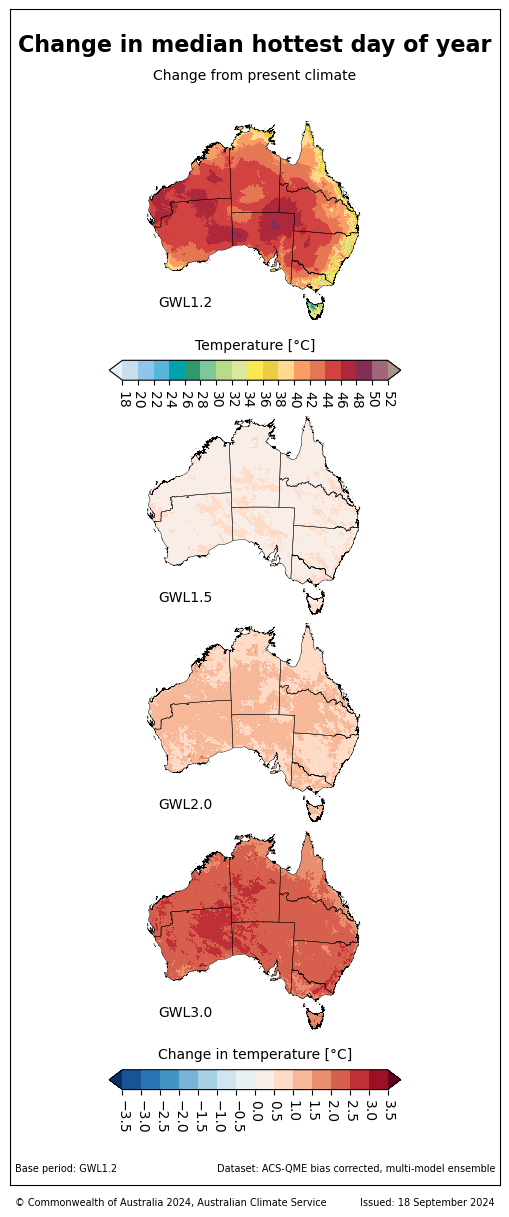

In [8]:
%%time 

var = "TXx"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

gwl12_kwargs={"cmap": cmap_dict["tasmax"],
                 "cbar_extend":"both",
                 "ticks":np.arange(18,53,2),
                 "tick_labels":None,
                 "cbar_label":"Temperature [\N{DEGREE SIGN}C]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Change in median hottest day of year",
                        date_range = f"Change from present climate",
                        baseline="GWL1.2",
                        cmap = cmap_dict["tas_anom"],
                        ticks = np.arange(-3.5, 3.6, 0.5),
                        cbar_label = "Change in temperature [\N{DEGREE SIGN}C]",
                        dataset_name = "ACS-QME bias corrected, multi-model ensemble",
                        watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="vertical")

In [ ]:
var="TXx"
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/TXx/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard(data=ds_gwl30[var],
                regions = regions,
                title = "Annual maximum daily maximum\ntemperature",
                date_range = "Global Warming Level 3.0[\N{DEGREE SIGN}C]",
                cmap = cmap_dict["tasmax"],
                ticks = np.arange(18,53,2),
                cbar_label = "Temperature [\N{DEGREE SIGN}C]",
                cbar_extend="both",
                dataset_name = "ACS-QME bias corrected, multi-model ensemble",
                watermark="",)

CPU times: user 1min 58s, sys: 265 ms, total: 1min 58s
Wall time: 1min 58s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

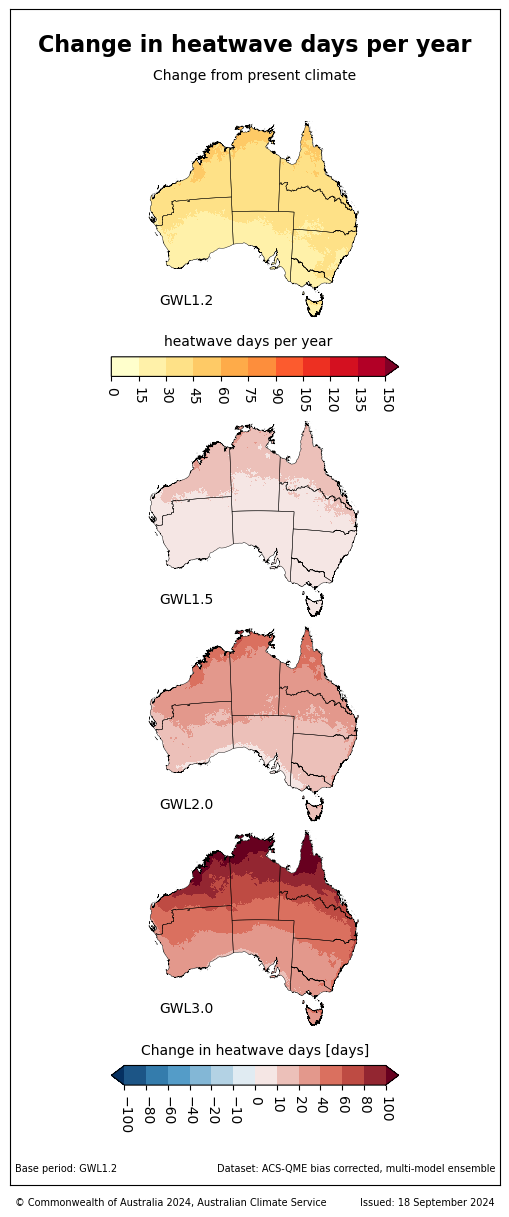

In [10]:
%%time 

var = "HWF"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict["EHF_days"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "heatwave days per year",
                         gwl12_ticks= np.arange(0,165, 15),
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Change in heatwave days per year",
                        date_range = f"Change from present climate",
                        baseline="GWL1.2",
                        cmap = cmap_dict["ipcc_temp_div"],
                        ticks = [-100, -80, -60, -40, -20, -10, 0, 10, 20, 40, 60, 80, 100],
                        cbar_label = "Change in heatwave days [days]",
                        dataset_name = "ACS-QME bias corrected, multi-model ensemble",
                        watermark="",
                       orientation="vertical")

CPU times: user 1min 56s, sys: 308 ms, total: 1min 57s
Wall time: 1min 59s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

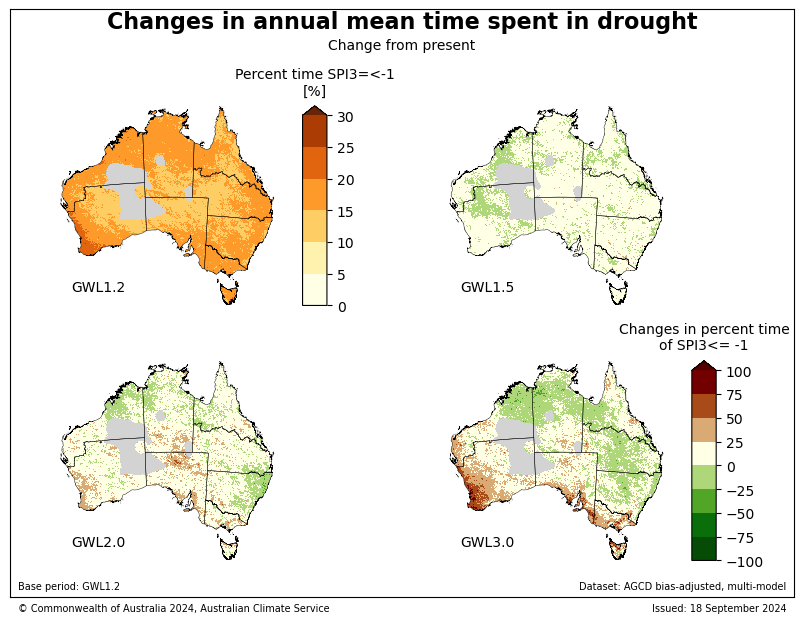

In [11]:
%%time
var="SPI3"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_GWL_1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)


ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL1.5_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL2.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL3.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                        gwl12_cmap=cm.YlOrBr,
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "Percent time SPI3=<-1\n[%]",
                         gwl12_ticks= np.arange(0,35, 5),
                        ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Changes in annual mean time spent in drought",
                        date_range="Change from present",
                        baseline="GWL1.2",
                        cmap = cmap_dict["aridity_anom_r"],
                        ticks = np.arange(-100, 101, 25),
                        cbar_label = "Changes in percent time\nof SPI3<= -1",
                        dataset_name = "AGCD bias-adjusted, multi-model",
                        cbar_extend="max",
                        watermark="",
                       orientation="square",
                        agcd_mask=True,
                     )

CPU times: user 2min, sys: 287 ms, total: 2min
Wall time: 2min


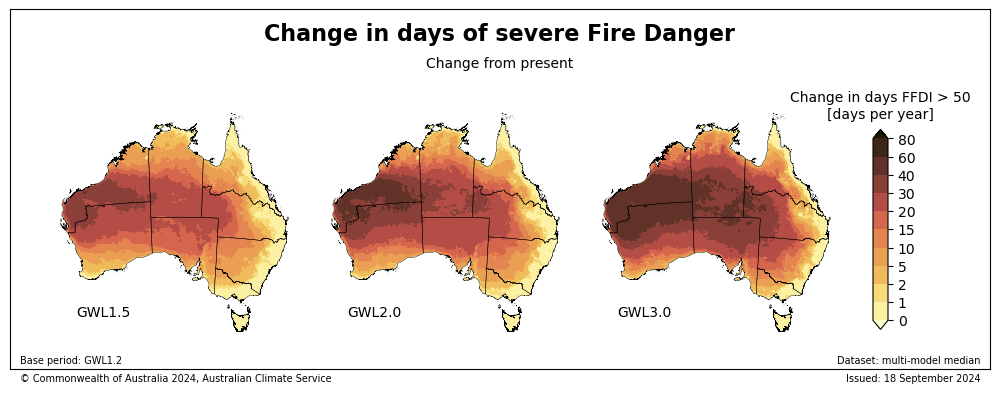

In [12]:
%%time 
# FFDI >50  multimodel median
var = "days50"

ffdi_ge50_mmm = xr.open_dataset(f"/g/data/ia39/ncra/fire/change_threshold_50.nc")

ds_gwl12 = ffdi_ge50_mmm.sel(period=0).drop_vars(["period"])
ds_gwl15 = ffdi_ge50_mmm.sel(period=1).drop_vars(["period"])
ds_gwl20 = ffdi_ge50_mmm.sel(period=2).drop_vars(["period"])
ds_gwl30 = ffdi_ge50_mmm.sel(period=3).drop_vars(["period"])


plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in days of severe Fire Danger",
                    date_range="Change from present",
                    baseline="GWL1.2",
                    cmap = cmap_dict["ipcc_temp_seq"],
                    ticks = [0, 1, 2, 5, 10, 15, 20, 30, 40, 60, 80,],
                    cbar_label = "Change in days FFDI > 50\n[days per year]",
                    dataset_name = "multi-model median",
                    watermark="",
                    );

CPU times: user 2min 2s, sys: 269 ms, total: 2min 2s
Wall time: 2min 3s


(<Figure size 1000x300 with 6 Axes>,
 <matplotlib.colorbar.Colorbar at 0x150a516dcb80>)

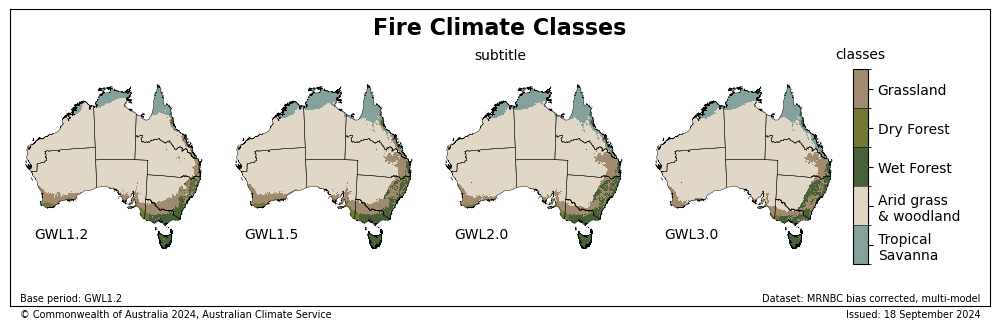

In [13]:
%%time
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]


plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                    title = "Fire Climate Classes",
                    baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    date_range="subtitle",
                    orientation="horizontal",
                    )

CPU times: user 2min 1s, sys: 259 ms, total: 2min 1s
Wall time: 2min 1s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

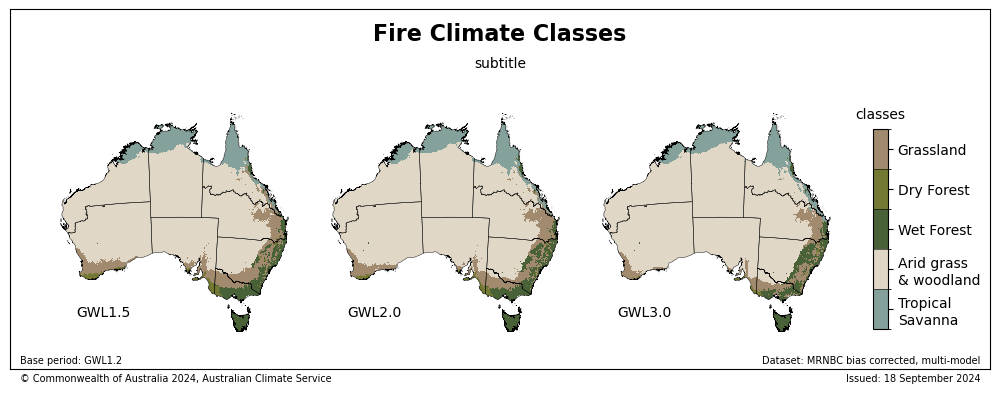

In [14]:
%%time
var = "fire_climate_class"

# ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]


plot_acs_hazard_3pp(
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                    title = "Fire Climate Classes",
                    baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    date_range="subtitle",
                    )

CPU times: user 2min 3s, sys: 278 ms, total: 2min 3s
Wall time: 2min 5s


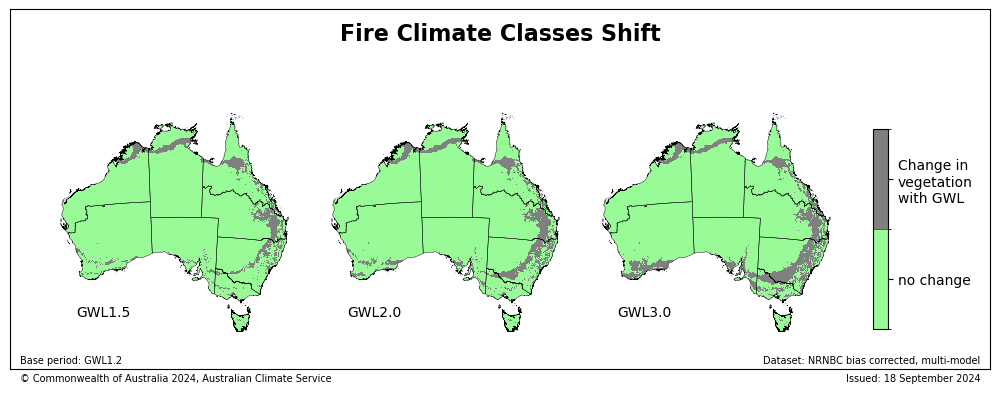

In [16]:
%%time 
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")

var = "fire_climate_class"

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Fire Climate Classes Shift",
                    baseline="GWL1.2",
                    cmap = colors.ListedColormap(["palegreen", "grey",]),
                    ticks = [0, 1,],
                    tick_labels = ["no change", "Change in\nvegetation\nwith GWL",],
                    cbar_label = "",
                    dataset_name = "NRNBC bias corrected, multi-model",
                    watermark="",
                    );

CPU times: user 2min 2s, sys: 242 ms, total: 2min 2s
Wall time: 2min 3s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

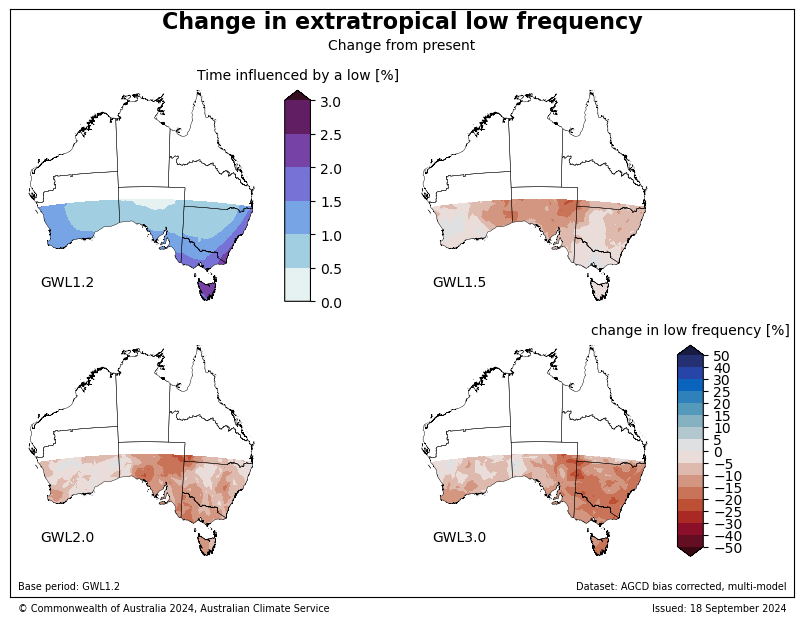

In [17]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["xts_freq"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,3.1, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12.where(ds_gwl12["lat"]<=-28),
                         ds_gwl15=ds_gwl15.where(ds_gwl15["lat"]<=-28),
                         ds_gwl20=ds_gwl20.where(ds_gwl20["lat"]<=-28),
                         ds_gwl30=ds_gwl30.where(ds_gwl30["lat"]<=-28),
                         title = "Change in extratropical low frequency",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["xts_freq_anom"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="square",
                       cmap_bad="w",
                        )

CPU times: user 2min 3s, sys: 344 ms, total: 2min 3s
Wall time: 2min 6s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

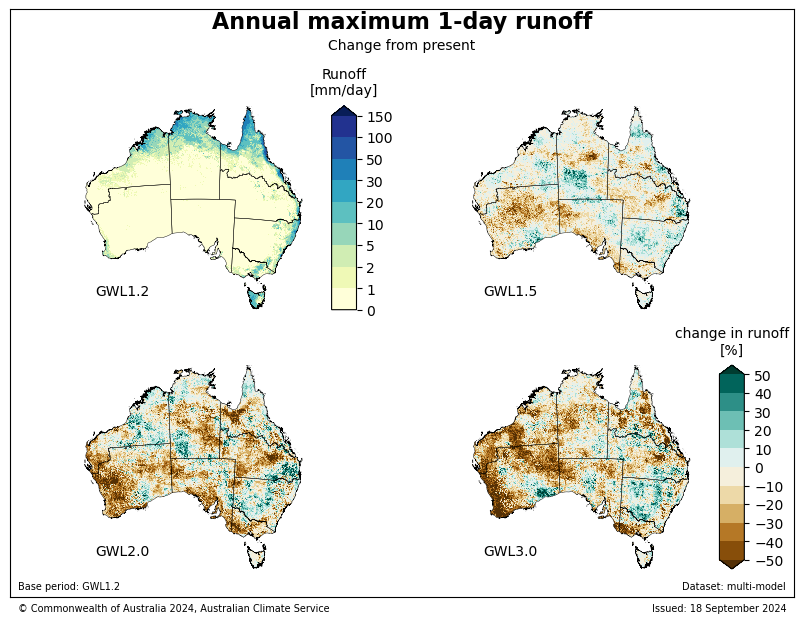

In [18]:
%%time

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_perc/max1day_runoff_ens_perc_1.2.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_1.5.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_2.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_3.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12["runoff_1.2"],
                        gwl12_cmap=cmap_dict["pr"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "Runoff\n[mm/day]",
                         gwl12_ticks= [0,1,2,5,10,20,30,50,100,150],
                       ds_gwl15=ds_gwl15[f"runoff_1.5"],
                    ds_gwl20=ds_gwl20[f"runoff_2"],
                    ds_gwl30=ds_gwl30[f"runoff_3"],
                    regions = regions,
                    title = "Annual maximum 1-day runoff",
                    baseline="GWL1.2",
                    date_range="Change from present",
                    cmap = cmap_dict["pr_anom"],
                    ticks = np.arange(-50, 51,10),
                    cbar_label = "change in runoff\n[%]",
                    dataset_name = "multi-model",
                    cbar_extend="both",
                    watermark="",
orientation="square")

CPU times: user 2min 1s, sys: 264 ms, total: 2min 1s
Wall time: 2min 1s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

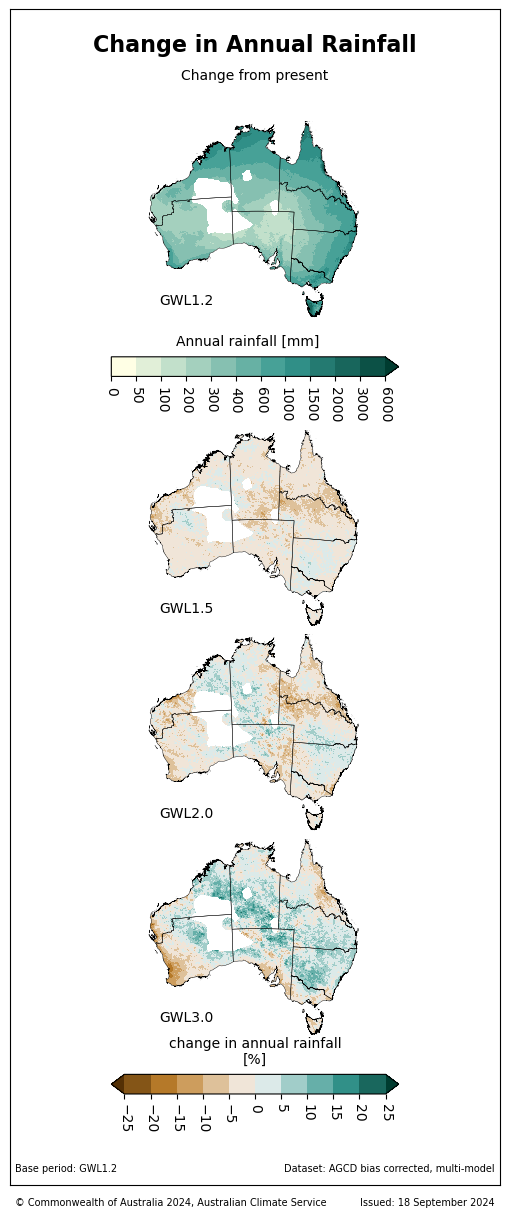

In [20]:
%%time
var = "prAdjust"

ds_gwl12 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12_annual.nc")
ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15_change_annual.nc")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20_change_annual.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change_annual.nc")

plot_acs_hazard_1plus3(ds_gwl12 =ds_gwl12[var]*12,
                       gwl12_cmap=cmap_dict['ipcc_prec_seq'],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "Annual rainfall [mm]",
                         gwl12_ticks= tick_dict["pr_annual"],
                        ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Change in Annual Rainfall",
                        baseline="GWL1.2",
                        date_range="Change from present",
                        cmap = cmap_dict['ipcc_prec_div'],
                        ticks = np.arange(-25, 26, 5.0),
                        cbar_label = "change in annual rainfall\n[%]",
                        dataset_name = "AGCD bias corrected, multi-model",
                        cbar_extend="both",
                        watermark="",
                       agcd_mask=True,
                       cmap_bad="w",
                       orientation="vertical")

CPU times: user 2min 43s, sys: 4.42 s, total: 2min 48s
Wall time: 2min 52s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

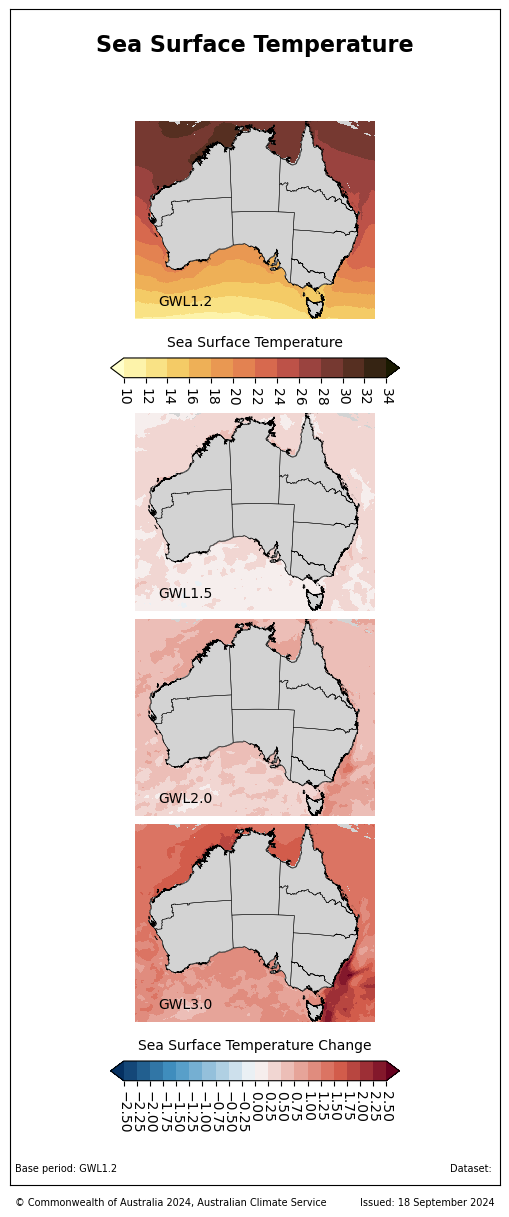

In [21]:
%%time
var="temp"

ds_gwl12 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/sst_climatology_GW1p2.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).drop_vars("st_ocean").mean(dim="month")

ds_gwl15 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/sst_climatology_GW1p5.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).drop_vars("st_ocean").mean(dim="month")
ds_gwl20 =   xr.open_dataset(f"/g/data/ia39/ncra/ocean/sst_climatology_GW2p0.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).drop_vars("st_ocean").mean(dim="month")
ds_gwl30 =   xr.open_dataset(f"/g/data/ia39/ncra/ocean/sst_climatology_GW3p0.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).drop_vars("st_ocean").mean(dim="month")

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict['ipcc_temp_seq'],
                         gwl12_cbar_extend= "both",
                         gwl12_cbar_label= "Sea Surface Temperature",
                         gwl12_ticks= np.arange(10,35, 2),
                        ds_gwl15=ds_gwl15[var] -ds_gwl12[var],
                    ds_gwl20=ds_gwl20[var] -ds_gwl12[var] ,
                    ds_gwl30=ds_gwl30[var] -ds_gwl12[var],
                    regions = regions,
                    title = "Sea Surface Temperature",
                    date_range="",
                    baseline="GWL1.2",
                    cmap = cmap_dict["ipcc_temp_div"],
                    ticks = np.arange(-2.5, 2.51, 0.25),
                    cbar_label = "Sea Surface Temperature Change",
                    dataset_name = "",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True,
                      orientation="vertical")

CPU times: user 2min 35s, sys: 2.76 s, total: 2min 38s
Wall time: 2min 40s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

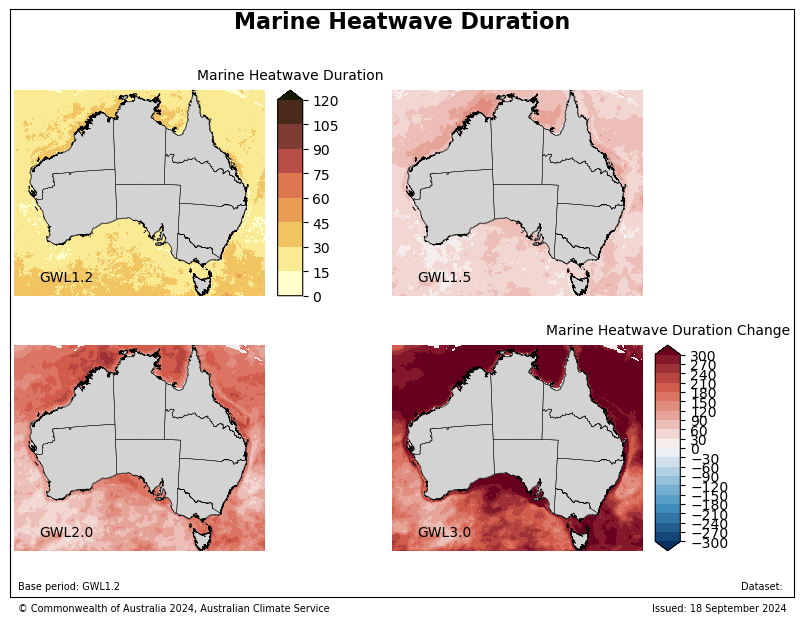

In [22]:
%%time
var="duration"

ds_gwl12 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/GW1p2_mhw.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"})

ds_gwl15 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/GW1p5_mhw.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"})
ds_gwl20 =   xr.open_dataset(f"/g/data/ia39/ncra/ocean/GW2p0_mhw.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"})
ds_gwl30 =   xr.open_dataset(f"/g/data/ia39/ncra/ocean/GW3p0_mhw.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"})


plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict['ipcc_temp_seq'],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "Marine Heatwave Duration",
                         gwl12_ticks= np.arange(0,121, 15),
                        ds_gwl15=ds_gwl15[var] ,
                    ds_gwl20=ds_gwl20[var] ,
                    ds_gwl30=ds_gwl30[var] ,
                    regions = regions,
                    title = "Marine Heatwave Duration",
                    date_range="",
                    baseline="GWL1.2",
                    cmap = cmap_dict["ipcc_temp_div"],
                    ticks = np.arange(-300, 301, 30),
                    cbar_label = "Marine Heatwave Duration Change",
                    dataset_name = "",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True,
                      orientation="square")

CPU times: user 2min 36s, sys: 5.12 s, total: 2min 41s
Wall time: 2min 48s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

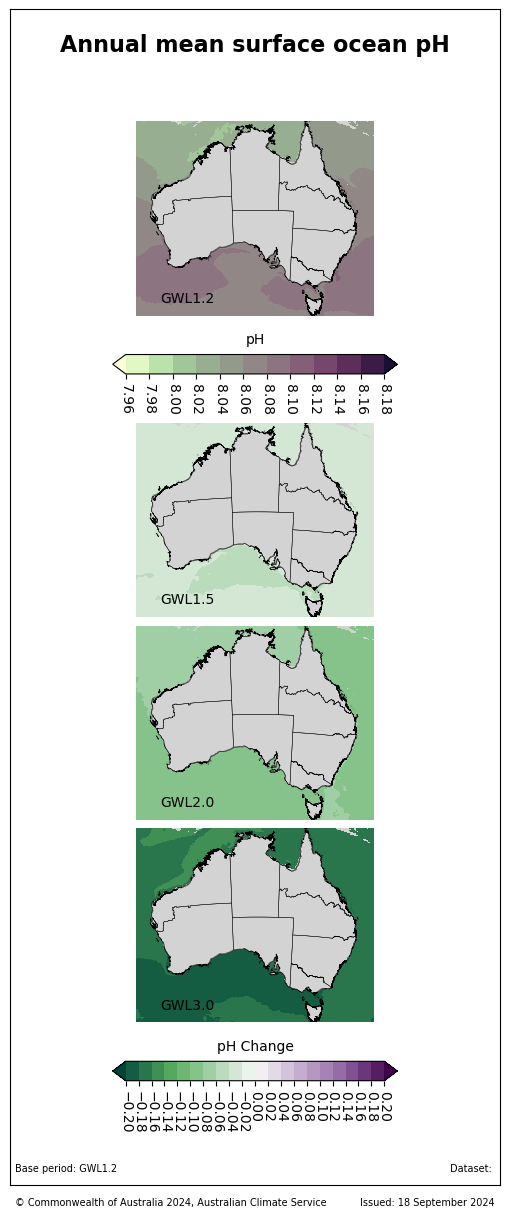

In [23]:
%%time
var="PH"

ds_gwl12 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/PH_climatology_GW1p2.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")

ds_gwl15 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/PH_climatology_GW1p5.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")
ds_gwl20 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/PH_climatology_GW2p0.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")
ds_gwl30 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/PH_climatology_GW3p0.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")


plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict['ipcc_chem_seq'],
                         gwl12_cbar_extend= "both",
                         gwl12_cbar_label= "pH",
                         gwl12_ticks= np.arange(7.96,8.2, 0.02),
                        ds_gwl15=ds_gwl15[var] -ds_gwl12[var],
                    ds_gwl20=ds_gwl20[var] -ds_gwl12[var],
                    ds_gwl30=ds_gwl30[var] -ds_gwl12[var],
                    regions = regions,
                    title = "Annual mean surface ocean pH",
                    date_range="",
                    baseline="GWL1.2",
                    cmap = cmap_dict["ipcc_chem_div"],
                    ticks = np.arange(-0.20, 0.21, 0.02),
                    cbar_label = "pH Change",
                    dataset_name = "",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True,
                      orientation="vertical")

CPU times: user 1min 48s, sys: 214 ms, total: 1min 49s
Wall time: 1min 49s


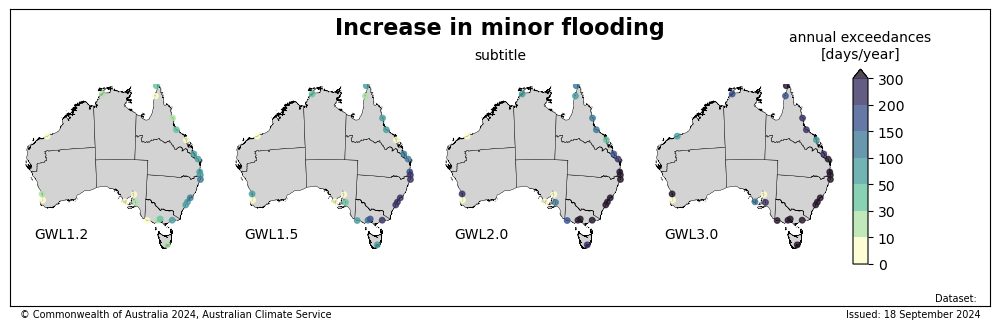

In [24]:
%%time 

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/minor_exceeds_means.csv")

plot_acs_hazard_4pp(station_df_gwl12=df[["lat", "lon", "0.2m 50th percentile"]].sort_values("0.2m 50th percentile"),
                    station_df_gwl15=df[["lat", "lon", "0.38m 50th percentile"]].sort_values("0.38m 50th percentile"),
                    station_df_gwl20=df[["lat", "lon", "0.6m 50th percentile"]].sort_values("0.6m 50th percentile"),
                    station_df_gwl30=df[["lat", "lon", "1.0m 50th percentile"]].sort_values("1.0m 50th percentile"),
                    regions = regions,
                    cmap=cmap_dict["pr_1"],
                    ticks=[0,10,30,50,100, 150,200, 300],
                    cbar_extend="max",
                    title = "Increase in minor flooding",
                    date_range = "subtitle",
                    cbar_label = "annual exceedances\n[days/year]",
                    dataset_name = "",
                    watermark=None,
                    facecolor="lightgrey",
                    
                    );

CPU times: user 1min 53s, sys: 236 ms, total: 1min 54s
Wall time: 1min 54s


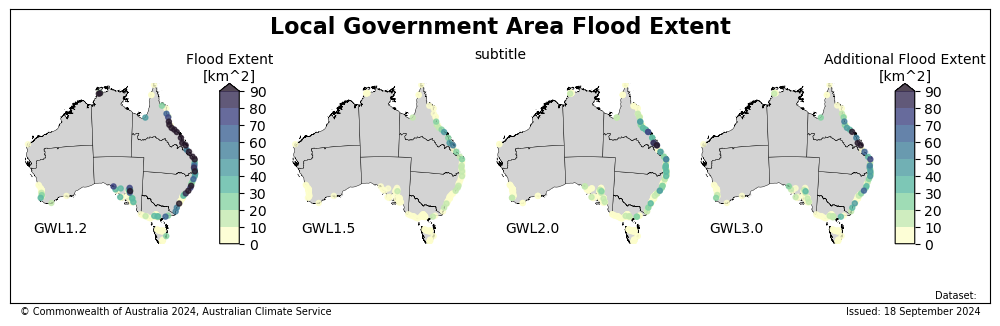

In [25]:
%%time 

var = "ext_50"

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_extents/inundation_stats/results_2020_change.csv")

plot_acs_hazard_1plus3(station_df_gwl12=df.where(df["gwli"]==1.2)[["lat", "lon", var]].sort_values(var),
                    station_df_gwl15=df.where(df["gwli"]==1.5)[["lat", "lon", var]].sort_values(var),
                    station_df_gwl20=df.where(df["gwli"]==2.0)[["lat", "lon", var]].sort_values(var),
                    station_df_gwl30=df.where(df["gwli"]==3.0)[["lat", "lon", var]].sort_values(var),
                         gwl12_cmap=cmap_dict["pr_1"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "Flood Extent\n[km^2]",
                         gwl12_ticks= np.arange(0,100,10),
                    regions = regions,
                    cmap=cmap_dict["pr_1"],
                    ticks=np.arange(0,100,10),
                    cbar_extend="max",
                    title = "Local Government Area Flood Extent",
                    date_range = "subtitle",
                    cbar_label = "Additional Flood Extent\n[km^2]",
                    dataset_name = "",
                    watermark=None,
                    facecolor="lightgrey",
                    );

CPU times: user 1min 51s, sys: 227 ms, total: 1min 51s
Wall time: 1min 53s


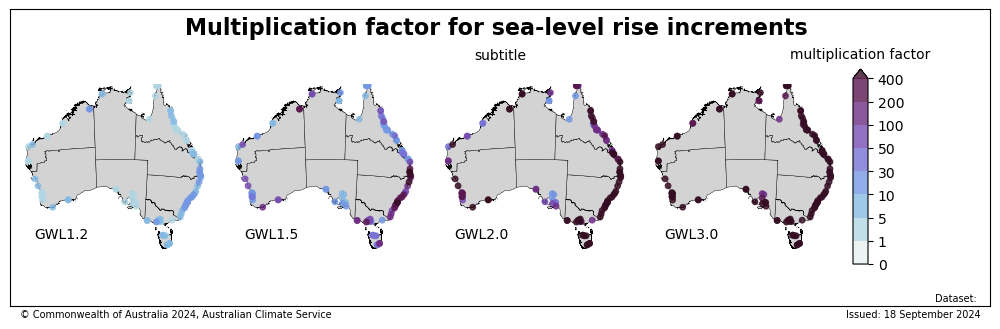

In [26]:
%%time 


var = "SWL_MFSLR_50"

df_slr020 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_GESLA3_MMALL_SLR14cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
df_slr038 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_GESLA3_MMALL_SLR32cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
df_slr060 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_GESLA3_MMALL_SLR54cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
df_slr100 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_GESLA3_MMALL_SLR94cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})

plot_acs_hazard_4pp(station_df_gwl12=df_slr020[["lat", "lon", var]].sort_values(var),
                    station_df_gwl15=df_slr038[["lat", "lon", var]].sort_values(var),
                    station_df_gwl20=df_slr060[["lat", "lon", var]].sort_values(var),
                    station_df_gwl30=df_slr100[["lat", "lon", var]].sort_values(var),
                    regions = regions,
                         # gwl12_cmap=cmap_dict["pr_1"],
                         # gwl12_cbar_extend= "max",
                         # gwl12_cbar_label= "multiplication factor",
                         # gwl12_ticks= np.arange(0,100,10),
                    cmap=cmap_dict["xts_freq"],
                    ticks=[0,1,5,10,30,50,100,200, 400],
                    cbar_extend="max",
                    title = "Multiplication factor for sea-level rise increments ",
                    date_range = "subtitle",
                    cbar_label = "multiplication factor",
                    dataset_name = "",
                    watermark=None,
                    facecolor="lightgrey",
                    );
